In [1]:
from lxml import etree
import json
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns


# Parsing 

In [2]:
def parse(file_path): 
    i = 0 
    tmp = ''
    key = ''
    xml2 = etree.iterparse(file_path, recover=True)
    data = []
    for action, elem in xml2:
        data.append((elem.attrib, elem.tag, elem.text))
    data_dict = {}
    
    for attrib, tag, text in data: 
        try : 
            tmp = key
            
            key = attrib.get('qualifier')
            element = attrib.get('element')
            
            #way to distinguish eliminate some nan!
            if key == 'none':
                key = element
            
            if key in data_dict.keys() : 
                i = i + 1 
                data_dict[key + str(i)] = text
            else : 
                i = 0 
                data_dict[key] = text
                
        except TypeError: 
            if 'subject' in tag:
                if 'subject' in data_dict.keys():
                    data_dict['subject'].append(text)
                else:
                    data_dict['subject'] = [text]

    return data_dict


### Get all data 

In [3]:
import os
rootdir = '/Users/lguillain/Documents/EPFL2018/Git-semester-project/papers-import/'

In [4]:
all_data = {}
i= 0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        path = os.path.join(subdir, file)
        if 'dublin_core' in (path) :
            i += 1
            num_doc = subdir[len(rootdir):]
            all_data[num_doc] = parse(path)

In [5]:
print('got data from {} files'.format(i))

got data from 874 files


In [6]:
df_data = pd.DataFrame(list(all_data.values()), index=all_data.keys())

In [7]:
def convert(arg): 
    try : 
        arg = dateutil.parser.parse(arg)
    except TypeError: 
        arg = arg 
    return arg 

In [8]:
import dateutil.parser
df_data['available'] = df_data['available'].apply(lambda x : convert(x))
df_data['accessioned'] = df_data['accessioned'].apply(lambda x : convert(x))

In [9]:
df_data[df_data['author'].str.contains("Vogel")]

,abstract,accessioned,author,author1,author2,author3,available,citation,iso,issued,...,author17,author18,author19,author20,author21,author22,author23,author24,author25,author26
import2016full/78,Students often have problems formulating und u...,2017-03-21 12:05:42+00:00,"Vogel, Freydis","Kollar, Ingo","Ufer, Stefan","Reiss, Kristina",2017-03-21 12:05:42+00:00,"Vogel, F., Kollar, I., Ufer, S., Reiss, K., & ...",en,2016-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
import2015short/373,Argumentation scripts have been proposed as an...,2017-06-19 14:51:54+00:00,"Vogel, Freydis","Kollar, Ingo","Ufer, Stefan","Reichersdorfer, Elisabeth",2017-06-19 14:51:54+00:00,"Vogel, F., Kollar, I., Ufer, S., Reichersdorfe...",en,2015-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_data.columns

Index([   'abstract', 'accessioned',      'author',     'author1',
           'author2',     'author3',   'available',    'citation',
               'iso',      'issued',   'publisher',       'title',
              'type',         'uri',          None,     'author4',
           'author5',     'author6',     'author7',     'author8',
           'subject',     'author9',    'author10',    'author11',
          'author12',    'author13',    'author14',    'author15',
          'author16',    'author17',    'author18',    'author19',
          'author20',    'author21',    'author22',    'author23',
          'author24',    'author25',    'author26'],
      dtype='object')

# Getting all authors in to one dataframe:

In [17]:
cleaning = cleaning[cleaning.value.notna()]

In [40]:
cleaning['index'].map(lambda x: '2016' in x).sum()

654

In [19]:
cleaning = df_data.reset_index().melt(id_vars=['index','subject', 'iso', 'uri','type','publisher','title', 'issued', 'accessioned', 'citation', 'available', 'abstract'])
cleaning = cleaning[cleaning.value.notna()]
cleaning = cleaning[cleaning.variable.notna()]

cleaning = cleaning[cleaning.value.map(lambda x: len(x) > 2)]

cleaning['author_name_length'] = cleaning.value.map(lambda x: len(x))

In [35]:
import re
cleaning['author_order'] = cleaning.variable.map(lambda x: 0 if len(re.search('\d*$', x).group(0)) == 0 else int(re.search('\d*$', x).group(0)))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
del cleaning['variable']

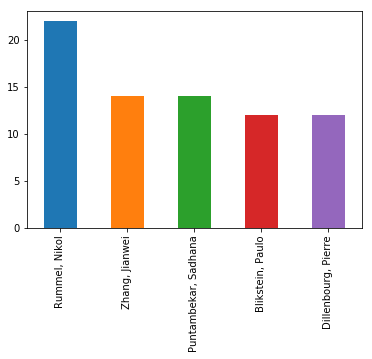

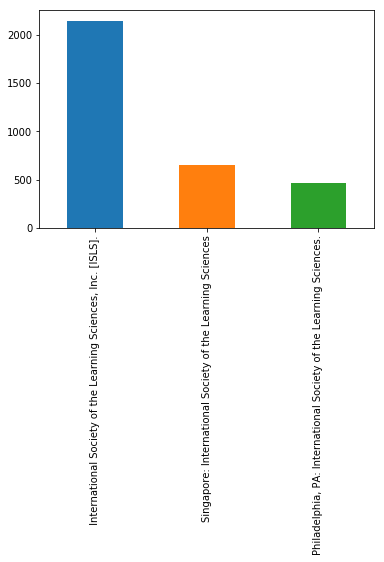

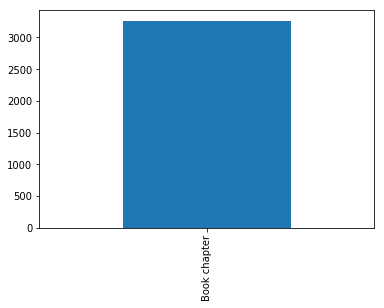

In [37]:
cleaning.value.value_counts().head().plot(kind='bar')
plt.show()
cleaning.publisher.value_counts().head().plot(kind='bar')
plt.show()
cleaning.type.value_counts().head().plot(kind='bar')

In [39]:
cleaning['index'].value_counts()

import2018/274          27
import2017/113          24
import2018/280          23
import2018/276          21
import2018/272          20
import2016short/167     20
import2017/115          19
import2018/268          18
import2017/117          18
import2017/114          18
import2018/271          18
import2015short/1110    18
import2018/281          17
import2018/282          17
import2016short/175     15
import2015short/1107    15
import2015short/1103    14
import2018/265          14
import2016short/176     13
import2018/273          13
import2018/279          13
import2018/270          12
import2016short/173     12
import2015short/1101    12
import2016short/164     12
import2015short/1116    12
import2016short/170     11
import2015short/1118    11
import2015full/165      10
import2016short/165     10
                        ..
import2018/435           1
import2018/44            1
import2018/524           1
import2017/109           1
import2018/289           1
import2016short/153      1
i

In [ ]:
cleaning.head()

# Now parse citation to get the shortened name (which can be matched to refrences)

In [ ]:
import numpy as np
import regex #

In [ ]:
get_names = r'([\w\-\&]*[\,] [\p{L}\.\ ]+[\&\,]?)'

cleaning.reset_index(drop=True, inplace=True)

cleaning['shortend_names'] = cleaning.citation.map(lambda x: re.match(r'[\S\s]*\(\d{4}\)', x, re.U)\
                                                   .group(0)).map(lambda x: [x.replace(',', '').replace('&', '').rstrip() for x in regex.findall(get_names, x)])

cleaning['shortend_names'] = cleaning.apply(lambda x: x['shortend_names'][x['author_order']], axis=1)

In [ ]:
cleaning.iloc[845].citation

In [ ]:
cleaning[cleaning['index'] == 'import2018/219']

In [ ]:
cleaning.rename(columns={'index': 'file'}, inplace=True)

In [ ]:
cleaning.to_csv('data/Parsed_metadata.csv')

In [ ]:
cleaning['merge_index'] = cleaning.apply(lambda x: x['file']+str(x['author_order']), axis=1)

# Merging with universities to associated email with name?
## not perfectly possible, but may not need perfect merge

In [ ]:
cleaning.dtypes

In [ ]:
universities = pd.read_csv('data/Universities.csv', index_col=0)

In [ ]:
universities.head()

In [ ]:
universities['merge_index'] = universities.apply(lambda x: x['file']+str(x['authorindex']), axis=1)

In [ ]:
pd.merge(universities, cleaning, on='merge_index')

In [ ]:
cleaning

In [ ]:
cleaning[cleaning.file == 'import2016short/145']

In [ ]:
universities[universities.file == 'import2016short/145']

Can't do that because order isn't same :( 

In [ ]:
mega_frame = pd.merge(universities, cleaning, on='merge_index')

In [ ]:
mega_frame[mega_frame.file_x == 'import2016short/145']

# Building the co-citation graph:

In [ ]:
references = pd.read_csv('data/References.csv', index_col=0)

In [ ]:
references.shape

In [ ]:
references.columns

In [ ]:
relevant_cols = ['ref', 'file', 'ref_parsed']

In [ ]:
co_citation = pd.merge(references[relevant_cols],references[relevant_cols], on='ref', how='outer')

In [ ]:
#remove self loops
co_citation = co_citation[co_citation.file_x != co_citation.file_y]

In [ ]:
co_citation

In [ ]:
nodes = pd.DataFrame(co_citation.file_x.drop_duplicates().reset_index(drop=True)).reset_index()
nodes.head()

In [ ]:
edges = pd.merge(nodes, co_citation, on='file_x')

#edges = pd.merge(nodes, co_citation, left_on='file_x', right_on='file_y')#[['index_x', 'index_y']]

edges.head()

way to identify reference uniquely without needing entire string...

In [ ]:
pd.merge(references,references, on='ref_parsed', how='outer').shape

In [ ]:
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

for idx, row in edges.iterrows():
    i, j = int(row.index_x), int(row.index_y)
    adjacency[j, i] = 1
    adjacency[i, j] = 1

In [ ]:
adjacency.shape

In [ ]:
graph = nx.from_numpy_array(adjacency)
nx.write_gexf(graph, 'data/co_citation_graph.gexf')